In [6]:
import netCDF4 as nc
import numpy as np
from matplotlib import pylab as plt
import gsw
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER 
import os
import numpy.ma as ma
import tools_for_croco as to

In [7]:
# Paramètres de la simulation
pathname='/home/brout/Documents/UBO/M2/deep_ocean_modelling/rez0.1_600days2/'  # Path where all the different files are located. To extract
                                                                            # ncfiles, change their name with the pattern 'property.nc'


Re=6.4E6
dt=300             # 5 minutes
NWRT=288           # every 24 hours
Nz=32              # Number of vertical levels
dl=0.1             # resolution in degrees
delta_t=dt*NWRT
print(delta_t/3600)
time_sample=10
lon_min,lon_max=-82,-74
lat_min,lat_max=23,34


24.0


In [8]:
def rho_to_zeta(grid):
    '''
    Linear interpolation of a rho grid on a zeta grid
    '''
    return(0.25*(grid[1:,1:]+grid[1:,:-1]+grid[:-1,1:]+grid[:-1,:-1]))

def u_to_zeta(grid):
    return(0.5*(grid[1:,:]+grid[:-1,:]))

def v_to_zeta(grid):
    return(0.5*(grid[:,1:]+grid[:,:-1]))

def rho_to_u(grid):
    return(0.5*(grid[:,1:]+grid[:,:-1]))

def rho_to_v(grid):
    return(0.5*(grid[1:,:]+grid[:-1,:]))

In [9]:
def tickstring_lon(x_ticks):
    tick=[]
    for i in range(len(x_ticks)):
        if x_ticks[i]<0 and x_ticks[i]%1==0:
            tick.append(str(abs(int(x_ticks[i])))+'°W')
        elif x_ticks[i]>0 and x_ticks[i]%1==0:
            tick.append(str(int(x_ticks[i]))+'°E')
        elif x_ticks[i]<0:
            tick.append(str(abs(x_ticks[i]))+'°W')
        elif x_ticks[i]>0:
            tick.append(str(abs(x_ticks[i]))+'°E')
        else:
            tick.append('0°')
    return(tick)

def tickstring_lat(y_ticks):
    tick=[]
    for i in range(len(y_ticks)):
        if y_ticks[i]<0 and y_ticks[i]%1==0:
            tick.append(str(abs(int(y_ticks[i])))+'°S')
        elif y_ticks[i]>0 and y_ticks[i]%1==0:
            tick.append(str(int(y_ticks[i]))+'°N')
        elif y_ticks[i]<0:
            tick.append(str(abs(y_ticks[i]))+'°S')
        elif y_ticks[i]>0:
            tick.append(str(abs(y_ticks[i]))+'°N')
        else:
            tick.append('0°')
    return(tick)

In [10]:
# Importation des fichiers nc.

file=pathname+'croco_frc.nc'
frc=nc.Dataset(file,'r',datamodel='NETCDF_CLASSIC',disk_format='hdf5')
frc.variables.keys()

odict_keys(['sms_time', 'shf_time', 'swf_time', 'sst_time', 'sss_time', 'srf_time', 'wwv_time', 'sustr', 'svstr', 'shflux', 'swflux', 'SST', 'SSS', 'dQdSST', 'swrad', 'Awave', 'Dwave', 'Pwave'])

In [11]:
u_frc=frc['sustr'][:]
print(u_frc.shape)

(12, 127, 80)


In [12]:
file=pathname+'croco_his.nc'
data=nc.Dataset(file,'r',datamodel='NETCDF_CLASSIC',disk_format='hdf5')
data.variables.keys()

odict_keys(['spherical', 'xl', 'el', 'xi_rho', 'xi_u', 'eta_rho', 'eta_v', 'Vtransform', 's_rho', 's_w', 'sc_r', 'sc_w', 'Cs_r', 'Cs_w', 'hc', 'h', 'f', 'pm', 'pn', 'lon_rho', 'lat_rho', 'lon_u', 'lat_u', 'lon_v', 'lat_v', 'angle', 'mask_rho', 'time_step', 'scrum_time', 'time', 'zeta', 'ubar', 'vbar', 'u', 'v', 'temp', 'salt', 'w', 'bostr', 'wstr', 'sustr', 'svstr', 'AKt', 'hbl', 'hbbl', 'shflux', 'swflux', 'swrad'])

In [17]:
u_str=data['sustr'][252:256]
v_str=data['svstr'][252:256]
lon_rho=data['lon_rho'][:]
lat_rho=data['lat_rho'][:]
lon_zeta=rho_to_zeta(lon_rho)
lat_zeta=rho_to_zeta(lat_rho)

In [18]:
u_zeta=0.5*(u_str[:,1:,:]+u_str[:,:-1,:])
v_zeta=0.5*(v_str[:,:,1:]+v_str[:,:,:-1])


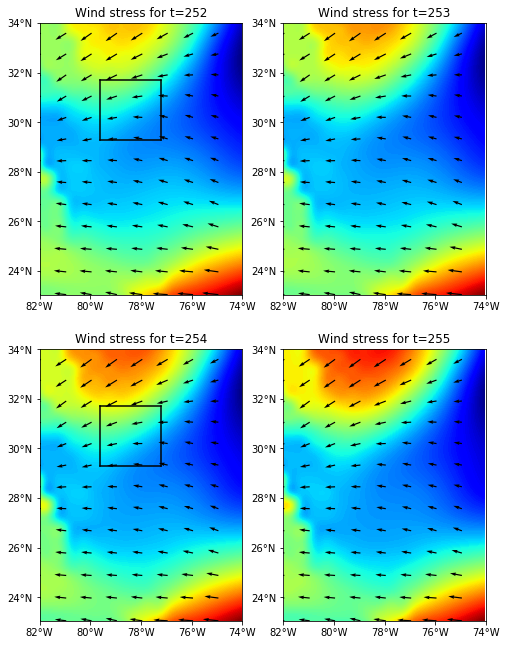

In [23]:
fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2,figsize=(8,11))
colorbar='jet'
time_indices=[0,1,2,3]
lat_min=24
ticks_number_lon=5
ticks_number_lat=6

latmin,latmax=70,98
lonmin,lonmax=24,48

ax0.contourf(lon_zeta,lat_zeta,np.sqrt(u_zeta[time_indices[0]]**2+v_zeta[time_indices[0]]**2),levels=200,cmap=colorbar)
ax0.quiver(lon_zeta[::10,::10],lat_zeta[::10,::10],u_zeta[time_indices[0],::10,::10],v_zeta[time_indices[0],::10,::10])
ax0.set_title('Wind stress for t='+str(time_indices[0]+252))
ax0.plot(lon_rho[latmin,lonmin:lonmax+1],lat_rho[latmin,lonmin:lonmax+1],c='k')
ax0.plot(lon_rho[latmax,lonmin:lonmax+1],lat_rho[latmax,lonmin:lonmax+1],c='k')
ax0.plot(lon_rho[latmin:latmax+1,lonmin],lat_rho[latmin:latmax+1,lonmin],c='k')
ax0.plot(lon_rho[latmin:latmax+1,lonmax],lat_rho[latmin:latmax+1,lonmax],c='k')

# Set ticks
plt.sca(ax0)
x_ticks=np.linspace(lon_min,lon_max,ticks_number_lon)
x_strings=tickstring_lon(x_ticks)
plt.xticks(x_ticks,x_strings)
y_ticks=np.linspace(lat_min,lat_max,ticks_number_lat)
y_strings=tickstring_lat(y_ticks)
plt.yticks(y_ticks,y_strings)


ax1.contourf(lon_zeta,lat_zeta,np.sqrt(u_zeta[time_indices[1]]**2+v_zeta[time_indices[1]]**2),levels=200,cmap=colorbar)
ax1.quiver(lon_zeta[::10,::10],lat_zeta[::10,::10],u_zeta[time_indices[1],::10,::10],v_zeta[time_indices[1],::10,::10])
ax1.set_title('Wind stress for t='+str(time_indices[1]+252))

# Set ticks
plt.sca(ax1)
x_ticks=np.linspace(lon_min,lon_max,ticks_number_lon)
x_strings=tickstring_lon(x_ticks)
plt.xticks(x_ticks,x_strings)
y_ticks=np.linspace(lat_min,lat_max,ticks_number_lat)
y_strings=tickstring_lat(y_ticks)
plt.yticks(y_ticks,y_strings)


ax2.contourf(lon_zeta,lat_zeta,np.sqrt(u_zeta[time_indices[2]]**2+v_zeta[time_indices[2]]**2),levels=200,cmap=colorbar)
ax2.quiver(lon_zeta[::10,::10],lat_zeta[::10,::10],u_zeta[time_indices[2],::10,::10],v_zeta[time_indices[2],::10,::10])
ax2.set_title('Wind stress for t='+str(time_indices[2]+252))
ax2.plot(lon_rho[latmin,lonmin:lonmax+1],lat_rho[latmin,lonmin:lonmax+1],c='k')
ax2.plot(lon_rho[latmax,lonmin:lonmax+1],lat_rho[latmax,lonmin:lonmax+1],c='k')
ax2.plot(lon_rho[latmin:latmax+1,lonmin],lat_rho[latmin:latmax+1,lonmin],c='k')
ax2.plot(lon_rho[latmin:latmax+1,lonmax],lat_rho[latmin:latmax+1,lonmax],c='k')

# Set ticks
plt.sca(ax2)
x_ticks=np.linspace(lon_min,lon_max,ticks_number_lon)
x_strings=tickstring_lon(x_ticks)
plt.xticks(x_ticks,x_strings)
y_ticks=np.linspace(lat_min,lat_max,ticks_number_lat)
y_strings=tickstring_lat(y_ticks)
plt.yticks(y_ticks,y_strings)


ax3.contourf(lon_zeta,lat_zeta,np.sqrt(u_zeta[time_indices[3]]**2+v_zeta[time_indices[3]]**2),levels=200,cmap=colorbar)
ax3.quiver(lon_zeta[::10,::10],lat_zeta[::10,::10],u_zeta[time_indices[3],::10,::10],v_zeta[time_indices[3],::10,::10])
ax3.set_title('Wind stress for t='+str(time_indices[3]+252))
# Set ticks
plt.sca(ax3)
x_ticks=np.linspace(lon_min,lon_max,ticks_number_lon)
x_strings=tickstring_lon(x_ticks)
plt.xticks(x_ticks,x_strings)
y_ticks=np.linspace(lat_min,lat_max,ticks_number_lat)
y_strings=tickstring_lat(y_ticks)
plt.yticks(y_ticks,y_strings)
plt.savefig(pathname+'forcing/frc3')


In [10]:
u_str_his=data['sustr'][:]
v_str_his=data['svstr'][:]
print(u_str_his.shape)
ush_zeta=0.5*(u_str_his[:,:-1,:]+u_str_his[:,1:,:])
vsh_zeta=0.5*(v_str_his[:,:,:-1]+v_str_his[:,:,1:])
lon_zeta=rho_to_zeta(lon_rho)
lat_zeta=rho_to_zeta(lat_rho)

(731, 127, 80)


In [11]:
colormap='jet'
lat_min=24
ticks_number_lon=5
ticks_number_lat=6

x_ticks=np.linspace(lon_min,lon_max,ticks_number_lon)
x_strings=tickstring_lon(x_ticks)

y_ticks=np.linspace(lat_min,lat_max,ticks_number_lat)
y_strings=tickstring_lat(y_ticks)


for i in range(374,730):
    fig,ax=plt.subplots(figsize=(12,12))
    plt.xticks(x_ticks,x_strings)
    plt.yticks(y_ticks,y_strings)
    #CS=ax.contour(lon_rho,lat_rho,eta[i],colors='k',linewidths=0.5,levels=100) # Change data input here
    #plt.clabel(CS, fontsize=10, inline=True, fmt = '%0.1f')
    mappable=ax.contourf(lon_zeta[::4,::4],lat_zeta[::4,::4],np.sqrt(ush_zeta[i,::4,::4]**2+vsh_zeta[i,::4,::4]**2),levels=200,cmap=colormap)  # Change data input here
    ax.quiver(lon_zeta[::10,::10],lat_zeta[::10,::10],ush_zeta[i,::10,::10],vsh_zeta[i,::10,::10])
    ax.set_xlabel('Longitude (°)',fontsize=18)
    ax.set_ylabel('Latitude (°)',fontsize=18)
    ax.set_title(r'Wind stress for $t=$'+str(i*delta_t/(3600*24))+' days',fontsize=20)
    #plt.savefig(pathname+'fig/'+'SSH_'+str(int(i*delta_t/(3600)//1))+'hours')
    plt.savefig(pathname+'forcing/forcing'+str(i))
    plt.clf()

/home/brout/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

([<matplotlib.axis.YTick at 0x7f8e03fafd90>,
 <a list of 6 Text yticklabel objects>)

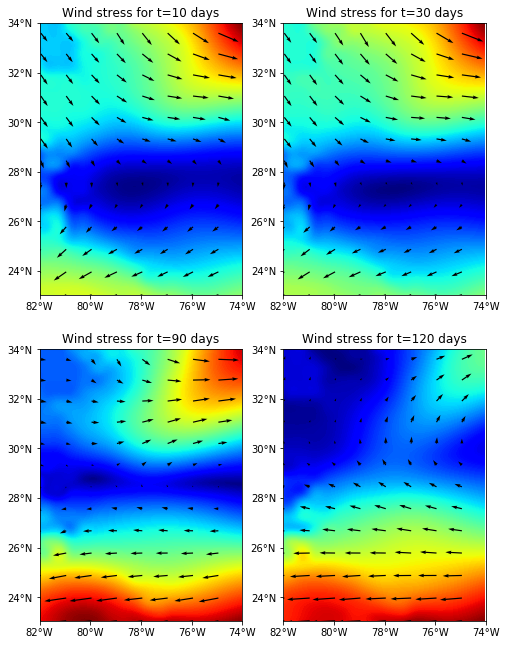

In [79]:
fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2,figsize=(8,11))
colorbar='jet'
time_indices=[10,30,90,120]
lat_min=24
ticks_number_lon=5
ticks_number_lat=6

ax0.contourf(lon_zeta,lat_zeta,np.sqrt(ush_zeta[time_indices[0]]**2+vsh_zeta[time_indices[0]]**2),levels=200,cmap=colorbar)
ax0.quiver(lon_zeta[::10,::10],lat_zeta[::10,::10],ush_zeta[time_indices[0],::10,::10],vsh_zeta[time_indices[0],::10,::10])
ax0.set_title('Wind stress for t='+str(time_indices[0])+' days')
# Set ticks
plt.sca(ax0)
x_ticks=np.linspace(lon_min,lon_max,ticks_number_lon)
x_strings=tickstring_lon(x_ticks)
plt.xticks(x_ticks,x_strings)
y_ticks=np.linspace(lat_min,lat_max,ticks_number_lat)
y_strings=tickstring_lat(y_ticks)
plt.yticks(y_ticks,y_strings)


ax1.contourf(lon_zeta,lat_zeta,np.sqrt(ush_zeta[time_indices[1]]**2+vsh_zeta[time_indices[1]]**2),levels=200,cmap=colorbar)
ax1.quiver(lon_zeta[::10,::10],lat_zeta[::10,::10],ush_zeta[time_indices[1],::10,::10],vsh_zeta[time_indices[1],::10,::10])
ax1.set_title('Wind stress for t='+str(time_indices[1])+' days')

# Set ticks
plt.sca(ax1)
x_ticks=np.linspace(lon_min,lon_max,ticks_number_lon)
x_strings=tickstring_lon(x_ticks)
plt.xticks(x_ticks,x_strings)
y_ticks=np.linspace(lat_min,lat_max,ticks_number_lat)
y_strings=tickstring_lat(y_ticks)
plt.yticks(y_ticks,y_strings)
ax2.contourf(lon_zeta,lat_zeta,np.sqrt(ush_zeta[time_indices[2]]**2+vsh_zeta[time_indices[2]]**2),levels=200,cmap=colorbar)
ax2.quiver(lon_zeta[::10,::10],lat_zeta[::10,::10],ush_zeta[time_indices[2],::10,::10],vsh_zeta[time_indices[2],::10,::10])
ax2.set_title('Wind stress for t='+str(time_indices[2])+' days')

# Set ticks
plt.sca(ax2)
x_ticks=np.linspace(lon_min,lon_max,ticks_number_lon)
x_strings=tickstring_lon(x_ticks)
plt.xticks(x_ticks,x_strings)
y_ticks=np.linspace(lat_min,lat_max,ticks_number_lat)
y_strings=tickstring_lat(y_ticks)
plt.yticks(y_ticks,y_strings)


ax3.contourf(lon_zeta,lat_zeta,np.sqrt(ush_zeta[time_indices[3]]**2+vsh_zeta[time_indices[3]]**2),levels=200,cmap=colorbar)
ax3.quiver(lon_zeta[::10,::10],lat_zeta[::10,::10],ush_zeta[time_indices[3],::10,::10],vsh_zeta[time_indices[3],::10,::10])
ax3.set_title('Wind stress for t='+str(time_indices[3])+' days')
# Set ticks
plt.sca(ax3)
x_ticks=np.linspace(lon_min,lon_max,ticks_number_lon)
x_strings=tickstring_lon(x_ticks)
plt.xticks(x_ticks,x_strings)
y_ticks=np.linspace(lat_min,lat_max,ticks_number_lat)
y_strings=tickstring_lat(y_ticks)
plt.yticks(y_ticks,y_strings)


In [13]:
#Pour faire le film
os.system("ffmpeg -f image2 -r 1/0.1 -i " + pathname + "forcing/forcing%03d.png -vcodec mpeg4 -y " + pathname +"forcing/film.mp4")


0